# Importing libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Uploading the data

In [3]:
df=pd.read_csv("Data/waterquality.csv")
gdf = gpd.read_file('Data/india-states/Igismap/Indian_States.shp')

In [4]:
df.head(5)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


<AxesSubplot:title={'center':'Missing Values Per Feature'}>

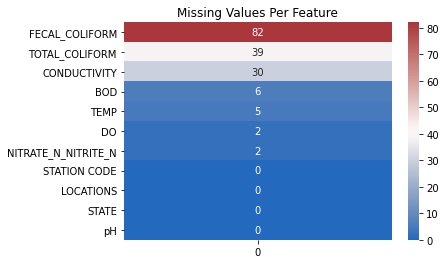

In [5]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [7]:
df_clean = df.loc[df['DO'].notnull() & df['pH'].notnull() & df['CONDUCTIVITY'].notnull() & df['BOD'].notnull()& df['NITRATE_N_NITRITE_N'].notnull() & df['FECAL_COLIFORM'].notnull() & df['TOTAL_COLIFORM'].notnull() ]

In [8]:
df_clean.head(5)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [25]:
import pandas as pd



            Paramètres      Si  V_ideal
0                   DO    10.0     14.6
1                   PH     8.5      7.0
2         CONDUCTIVITY  1000.0      0.0
3                  BOD     5.0      0.0
4  NITRATE_N_NITRITE_N    45.0      0.0
5       FECAL_COLIFORM   100.0      0.0
6       TOTAL_COLIFORM  1000.0      0.0


k : constante de proportionnalité et peut également être calculée à l'aide de
l'équation suivante:
k =1/∑ (1/Si)

In [26]:
Somme_Si=0.0
for i in Permissible_limits['Si']:
    Somme_Si+=1/i
    
k=1/Somme_Si 

2.213029391344596


 Dans cette approche,
une valeur numérique appelée poids relatif (Wi), spécifique à chaque
paramètre physico-chimique, est calculée (Tab.1) selon la formule suivante :
Wi =k/Si

In [32]:
#Parameter_unit_weights
Wi=list()
for i in Permissible_limits['Si']:
    Wi.append(round(k/i,4))

In [35]:
Permissible_limits['Parameter_unit_weights']=Wi
Permissible_limits

,Paramètres,Si,V_ideal,Parameter_unit_weights
0,DO,10.0,14.6,0.2213
1,PH,8.5,7.0,0.2604
2,CONDUCTIVITY,1000.0,0.0,0.0022
3,BOD,5.0,0.0,0.4426
4,NITRATE_N_NITRITE_N,45.0,0.0,0.0492
5,FECAL_COLIFORM,100.0,0.0,0.0221
6,TOTAL_COLIFORM,1000.0,0.0,0.0022


qi = 100 ×(Vi − VIdeal)/(Si − VIdeal)
où :Vi est la valeur mesurée du paramètre i dans le test
échantillonnesVIdeal est la valeur idéale du paramètre i en pur
eau (0 pour tous les paramètres sauf DO = 14:6 mg/l et
pH = 7:0), et Si est la valeur standard recommandée de
paramètre i

In [37]:
df=df_clean
start=0
end=447
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5]  
co = df.iloc [start:end ,6].astype(np.float64)
bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
fc=df.iloc [start:end ,9].astype(np.float64)

In [38]:
qna=na.apply(lambda x:100*x/45)

In [39]:
qna

0       4.444444
1       4.444444
2      20.000000
3       7.888889
4       5.977778
         ...    
529     2.222222
530     6.666667
531     6.666667
532     4.444444
533     2.222222
Name: NITRATE_N_NITRITE_N, Length: 447, dtype: float64

In [ ]:
DO = 14:6 mg/l and
pH = 7:0

In [ ]:
df['wph']=df.npH * 0.2604
df['wdo']=df.ndo * 0.2213
df['wbdo']=df.nbdo * 0.4426
df['wec']=df.nec* 0.0221
df['wna']=df.nna * 0.0492
df['wco']=df.nco * 0.0022
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Charger les données
data = pd.read_csv('Data/fichier.csv')

# Prétraitement des données
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [128]:
# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

In [129]:
# Créer des séries temporelles de longueur définie (time_steps)
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

In [130]:
time_steps = 12
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape des données d'entrée pour la modélisation en réseau LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [131]:
# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1411/1411 - 5s - loss: 0.0145
Epoch 2/100
1411/1411 - 2s - loss: 0.0087
Epoch 3/100
1411/1411 - 3s - loss: 0.0087
Epoch 4/100
1411/1411 - 2s - loss: 0.0085
Epoch 5/100
1411/1411 - 2s - loss: 0.0085
Epoch 6/100
1411/1411 - 3s - loss: 0.0086
Epoch 7/100
1411/1411 - 2s - loss: 0.0084
Epoch 8/100
1411/1411 - 3s - loss: 0.0083
Epoch 9/100
1411/1411 - 2s - loss: 0.0084
Epoch 10/100
1411/1411 - 3s - loss: 0.0083
Epoch 11/100
1411/1411 - 2s - loss: 0.0082
Epoch 12/100
1411/1411 - 2s - loss: 0.0082
Epoch 13/100
1411/1411 - 3s - loss: 0.0081
Epoch 14/100
1411/1411 - 2s - loss: 0.0084
Epoch 15/100
1411/1411 - 3s - loss: 0.0082
Epoch 16/100
1411/1411 - 3s - loss: 0.0082
Epoch 17/100
1411/1411 - 3s - loss: 0.0080
Epoch 18/100
1411/1411 - 2s - loss: 0.0082
Epoch 19/100
1411/1411 - 3s - loss: 0.0080
Epoch 20/100
1411/1411 - 2s - loss: 0.0082
Epoch 21/100
1411/1411 - 2s - loss: 0.0081
Epoch 22/100
1411/1411 - 3s - loss: 0.0081
Epoch 23/100
1411/1411 - 2s - loss: 0.0080
Epoch 24/100
1411/14

In [136]:
# Faire des prévisions sur l'ensemble de test
testPredict = model.predict(X_test)

Prévisions pour les années futures:
[[0.74209243]]



# Projet 2

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [41]:
df=pd.read_csv("Data/waterquality.csv")
gdf = gpd.read_file('Data/india-states/Igismap/Indian_States.shp')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1900, :]
df.shape

(534, 11)

In [42]:
#afficher les 5 premiére lignes
df.head(5)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [43]:
#afficher la taille du dataframe (nb_lignes,nb_colonnes)
df.shape

(534, 11)

In [44]:
#afficher les types des données dans chaque variables du dataframe
df.dtypes

STATION CODE             int64
LOCATIONS               object
STATE                   object
TEMP                   float64
DO                     float64
pH                     float64
CONDUCTIVITY           float64
BOD                    float64
NITRATE_N_NITRITE_N    float64
FECAL_COLIFORM         float64
TOTAL_COLIFORM         float64
dtype: object

In [45]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

In [46]:
df.shape

(534, 11)

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

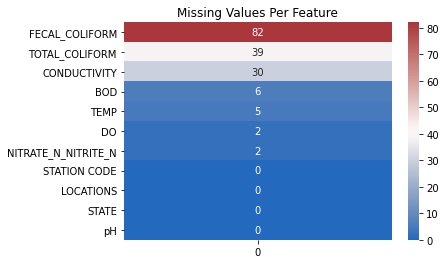

In [47]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [48]:
df_num = df.select_dtypes(exclude="object")# Selectioner les donneés numériques
df_num_col = df_num.columns 
imputer = SimpleImputer(strategy="most_frequent")#crée un objet imputer à l'aide de la classe SimpleImputer
#Remplacer toutes les valeurs manquantes dans les données numériques par la valeur médiane de chaque colonne
df_num = imputer.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=df_num_col)

In [49]:
# Filling Categorical missing values
df_temp = df.select_dtypes(include="object")
df_temp.isnull().sum()

LOCATIONS    0
STATE        0
dtype: int64

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

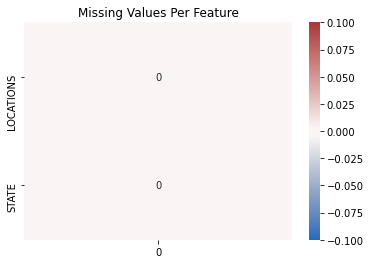

In [54]:
df_res = df_temp
plt.title('Missing Values Per Feature')
nans = df_res.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

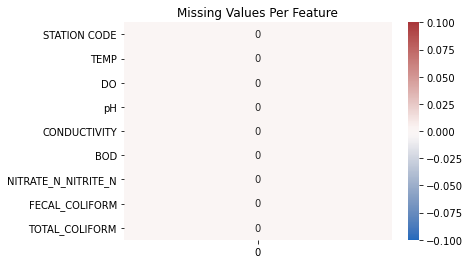

In [55]:
plt.title('Missing Values Per Feature')
nans = df_num.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

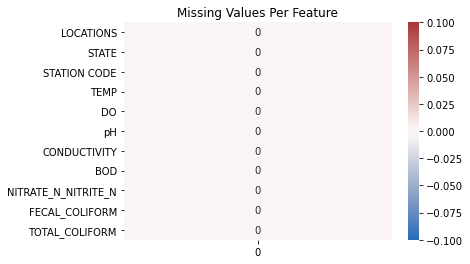

In [56]:
df_final = pd.concat([df_res, df_num], axis=1)
plt.title('Missing Values Per Feature')
nans = df_final.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [57]:
df_final.head(5)

,LOCATIONS,STATE,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,1312.0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,2177.0,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,2182.0,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,2179.0,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,2183.0,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


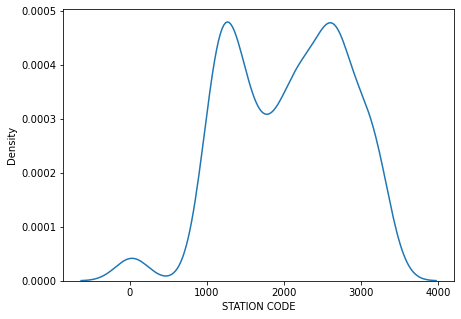

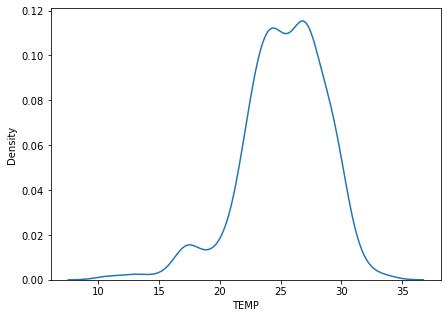

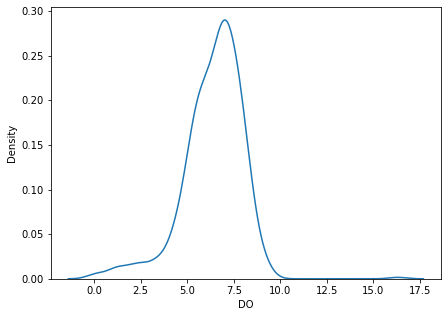

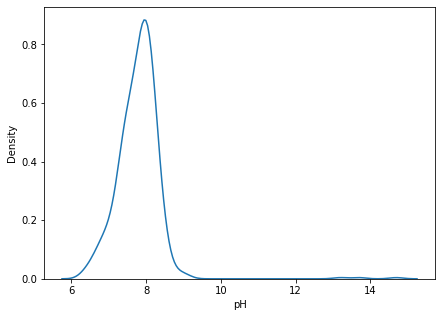

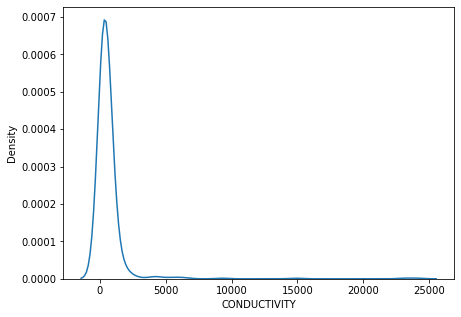

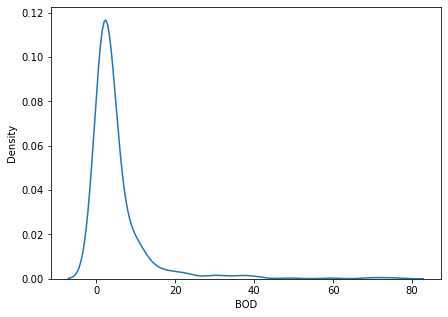

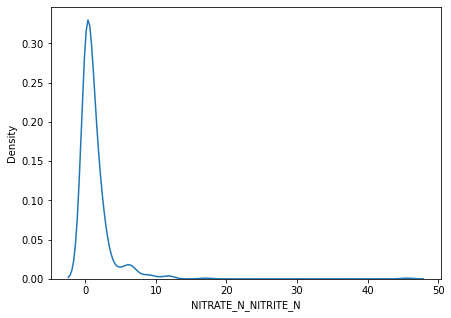

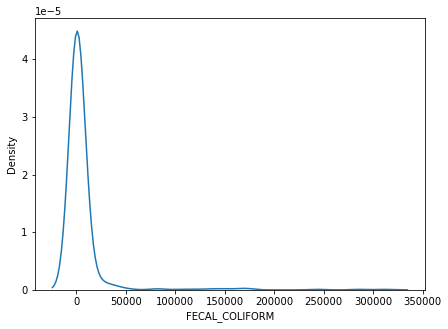

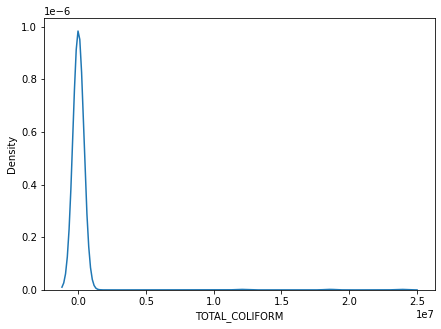

In [58]:
#Tracer PDFs de tous les attributs numériques de l’ensemble de données

df_num_final = df_final.select_dtypes(exclude="object")

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(df_num_final)

In [59]:
# Ici, presque tous les plots kde sont gaussiens 
# Utilisation de la normalisation Z-Score pour détecter les valeurs aberrantes

df_num_final_norm = df_num_final.apply(zscore, axis=0)

def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[:, index]
        greater_than_3 = col_index[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method: ", len(indices_arr))
df_final.iloc[indices_arr, :]

Number of outliers using Z-Score method:  44


,LOCATIONS,STATE,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
259,GANDAK RIVER U/S ROAD BRIDGE MUZAFFARPUR (NH),BIHAR,3124.0,23.1,16.3,8.1,269.0,2.0,0.0,769.0,1655.0
237,"SAI AT UNNAO AFTER DRAIN OUTFALL, U.P.",UTTAR PRADESH,1361.0,26.8,7.3,13.2,237.0,3.7,0.1,2164.0,4427.0
359,"BHIMA AT FEROZABAD VILLAGE (D/S), KARNATAKA",KARNATAKA,1184.0,28.5,6.7,14.7,917.0,3.0,0.2,992.0,1542.0
455,BHADRA AT MALLESWARAM D/S OF KIOCL KARNATAKA,KARNATAKA,1091.0,21.8,5.5,13.7,223.0,1.0,0.1,718.0,2946.0
130,"HAMSALA DEEVI , GUNTUR DIST, A.P",ANDHRA PRADESH,1782.0,26.0,5.5,7.6,14804.0,0.7,0.7,2.0,1450.0
183,"CHAMBAL AT NAGDA D/S, M.P.",MADHYA PRADESH,1366.0,26.7,1.5,8.2,6485.0,1.0,5.4,4.0,1600.0
317,KUNDALIKA RIVER AT ARE KHURD ( SALINE ZONE ),MAHARASHTRA,2198.0,25.0,5.5,7.4,6166.0,7.7,1.1,44.0,67.0
318,KUNDALIKA RIVER NEAR SALAV BRIDGE (SALINA ZONE...,MAHARASHTRA,2671.0,25.3,5.3,7.7,24062.0,9.9,1.2,156.0,304.0
330,SAVITRI RIVER AT OVALE VILLAGE.,MAHARASHTRA,2199.0,28.4,6.7,7.3,9293.0,3.5,1.8,4.0,1600.0
483,"SURSAGAR LAKE AT BARODA, GUJARAT",GUJARAT,1346.0,29.3,6.4,8.0,23125.0,4.8,2.0,4500.0,178.0


In [60]:
df_final.drop(indices_arr, axis=0, inplace=True)
df_final.shape

(495, 11)

In [63]:
# Calculating Water Quality Index of each sample
df_num_final = df_final.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["TEMP"], axis=1, inplace=True)

# Create a dataframe with three columns
parametre_valeur = pd.DataFrame({
    'Paramètres': ['DO','PH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM'],
    'Si': [10,8.5,1000,5,45,100,1000],#(valeur maximale standard)
    'V_ideal':[14.6,7.0,0,0,0,0,0] # Ideal values of paramters(vIdeal)
})

Somme_Si=0.0
for i in parametre_valeur['Si']:
    Somme_Si+=1/i
    
k=1/Somme_Si 
#Parameter_unit_weights
Wi=list()
for i in parametre_valeur['Si']:
    Wi.append(round(k/i,4))
    
parametre_valeur['wi']=Wi
parametre_valeur

C:\Users\amine\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Paramètres,Si,V_ideal,wi
0,DO,10.0,14.6,0.2213
1,PH,8.5,7.0,0.2604
2,CONDUCTIVITY,1000.0,0.0,0.0022
3,BOD,5.0,0.0,0.4426
4,NITRATE_N_NITRITE_N,45.0,0.0,0.0492
5,FECAL_COLIFORM,100.0,0.0,0.0221
6,TOTAL_COLIFORM,1000.0,0.0,0.0022


In [64]:
# Weight Vector(wi)
wi = parametre_valeur['wi']
# Standard values of parameters(si)
si = parametre_valeur['Si']
# Ideal values of paramters(vIdeal)
vIdeal = parametre_valeur['V_ideal']

In [65]:
def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [66]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [67]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [68]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(495, 12)

In [69]:
# These are samples with negative WQI
df_wqi[(df_wqi["WQI"] < 0)]

,LOCATIONS,STATE,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,WQI
1,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,2177.0,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,-8029.943614
2,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,2182.0,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,-7309.985900
3,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,2179.0,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,-7153.881849
4,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,2183.0,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,-7851.548612
5,GODAVARI RIVER AT KAPILA- GODAVARI CONFLUENCE ...,MAHARASHTRA,2181.0,25.0,4.5,7.5,513.0,12.6,2.30,131.0,320.0,-5923.132926
...,...,...,...,...,...,...,...,...,...,...,...,...
489,"LAKE RAJSAMAND, RAJSAMAND- POINT NO. 2, RAJSAM...",RAJASTHAN,2939.0,21.2,4.9,8.6,593.0,1.1,1.00,4.0,7.0,-8855.981818
490,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,2940.0,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,-9356.321644
491,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,2941.0,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,-8871.111401
492,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,2942.0,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,-8898.995315


In [70]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [71]:
df_wqi['quality']=df_wqi["WQI"].apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable for drinking')))))

In [72]:
df_wqi

,LOCATIONS,STATE,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,WQI,quality
0,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,1312.0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,254.600201,Unsuitable for drinking
14,"GODAVARI AT DHALEGAON, MAHARASHTRA",MAHARASHTRA,12.0,27.2,7.0,7.9,637.0,4.7,6.50,2.0,80.0,5651.891956,Unsuitable for drinking
15,"GODAVARI AT RAHER, MAHARASHTRA",MAHARASHTRA,1209.0,29.7,6.4,8.0,656.0,3.6,1.80,3.0,82.0,50.829191,Unsuitable for drinking
25,"GODAVARI AT MANCHERIAL, A.P.",ANDHRA PRADESH,13.0,29.5,4.1,9.1,518.0,16.5,0.00,240.0,900.0,4544.548193,Unsuitable for drinking
30,"GODAVARI AT POLAVARAM, A.P.",ANDHRA PRADESH,14.0,27.0,6.2,7.7,380.0,1.2,1.56,4.0,170.0,3352.926772,Unsuitable for drinking
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,NARSINHMEHTA TALAV,GUJARAT,1976.0,28.5,7.1,7.5,2100.0,21.0,1.00,4.0,95.0,9157.217065,Unsuitable for drinking
454,RANJITNAGAR TALAV,GUJARAT,1978.0,29.0,5.7,7.6,2980.0,11.0,6.78,4.0,1600.0,16912.085752,Unsuitable for drinking
462,"OLPAD, VILLAGE POND OLPAD, SURAT",GUJARAT,1979.0,29.0,5.9,7.8,1453.0,7.3,6.45,30.0,7.0,3393.336820,Unsuitable for drinking
480,UDAISAGAR LAKE AT UDAIPUR (INTAKE PT.) RAJASTHAN,RAJASTHAN,1286.0,23.9,4.6,8.4,1463.0,3.2,1.00,16.0,557.0,6792.649769,Unsuitable for drinking


In [73]:
df_wqi.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
STATION CODE,64.000000,1294.109375,767.028157,11.000000,1146.750000,1290.500000,1702.250000,2944.000000
TEMP,64.000000,26.340625,2.799417,17.200000,24.300000,27.000000,28.425000,30.600000
DO,64.000000,6.313281,1.009253,3.500000,5.575000,6.750000,7.025000,8.400000
pH,64.000000,7.885937,0.401532,7.200000,7.600000,7.900000,8.100000,9.100000
CONDUCTIVITY,64.000000,1366.390625,1127.764971,262.000000,731.250000,974.500000,1455.500000,5551.000000
BOD,64.000000,7.051562,6.841748,0.700000,2.100000,4.250000,9.625000,27.500000
NITRATE_N_NITRITE_N,64.000000,2.442031,2.254904,0.000000,0.875000,1.750000,3.300000,9.100000
FECAL_COLIFORM,64.000000,4003.125000,10408.944989,2.000000,4.000000,30.500000,783.000000,42500.000000
TOTAL_COLIFORM,64.000000,7838.843750,18860.595806,7.000000,478.000000,1466.500000,1600.000000,88917.000000
WQI,64.000000,5929.523027,8024.845617,50.829191,1423.476928,3002.174847,6337.939936,36197.775181


In [74]:
n_unsuitable=(df_wqi['quality']=='Unsuitable for drinking').sum()
n_very_poor=(df_wqi['quality']=='Very Poor').sum()
n_poor=(df_wqi['quality']=='Poor').sum()
n_good=(df_wqi['quality']=='Good').sum()
n_excellent=(df_wqi['quality']=='Excellent').sum()

In [75]:
print(n_excellent)

0


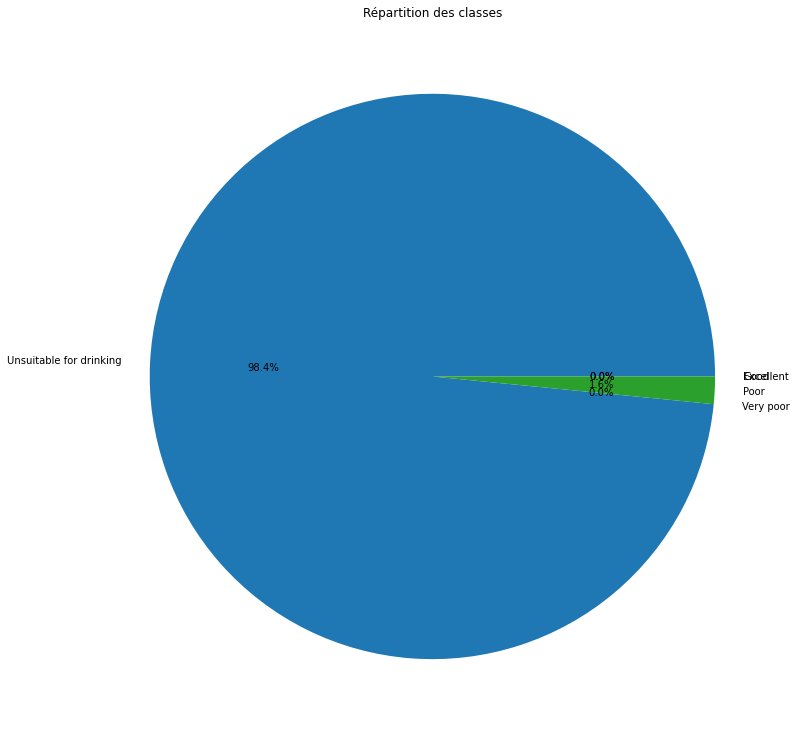

In [76]:
import matplotlib.pyplot as plt
# Définition des classes et de leurs effectifs
classes = ['Unsuitable for drinking', 'Very poor', 'Poor', 'Good', 'Excellent']
effectifs = [n_unsuitable,n_very_poor,n_poor,n_good,n_excellent]
# Création du diagramme circulaire
fig, ax = plt.subplots()
ax.pie(effectifs, labels=classes, autopct='%2.1f%%')
# Définir la taille de la figure
fig.set_size_inches(14, 13)
# Ajout d'un titre
ax.set_title('Répartition des classes')
# Affichage du diagramme
plt.show()

In [ ]:
df_final= df_final.fillna(df_final.groupby('STATE').transform('mean'))

In [99]:
df=pd.read_csv("Data/water_dataX.csv")
gdf = gpd.read_file('Data/india-states/Igismap/Indian_States.shp')
#Selectionner seulement les 1900 examples premiers car les autres exemples incorect 
#en plus contient beaucoup des donneés aberantes
df = df.iloc[0:1900, :]
df.shape

(1900, 12)

In [100]:
#convertir le types des donneés d'un certains variables en float
df['Temp']=pd.to_numeric(df['Temp'], errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'], errors='coerce')
df['PH']=pd.to_numeric(df['PH'], errors='coerce')
df['CONDUCTIVITY (�mhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (�mhos/cm)'], errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [101]:
#renommer les variables par des target plus simplement à utiliser que les anciennes 
df = df.rename(columns={'D.O. (mg/l)': 'DO'})
df = df.rename(columns={'CONDUCTIVITY (�mhos/cm)': 'CONDUCTIVITY'})
df = df.rename(columns={'B.O.D. (mg/l)': 'BOD'})
df = df.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)': 'NITRATE_N_NITRITE_N'})
df = df.rename(columns={'FECAL COLIFORM (MPN/100ml)': 'FECAL_COLIFORM'})
df = df.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean': 'TOTAL_COLIFORM'})
df.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [102]:
# Remplacer la chaine de caractere NAN valeur par la valeur NAN (np.nan)
def convert_to_nan(df):
    #récupère le nombre de colonnes dans df en utilisant l'attribut shape de l'objet DataFrame
    #qui renvoie un tuple contenant le nombre de lignes et de colonnes
    n_col = df.shape[1] 
    #on parcourt chaque colonne du DataFrame df à l'aide de la boucle for et index
    for index in range(n_col):
        #La ligne df.iloc[:, index] permet d'accéder à toutes les lignes de la colonne correspondante.
        #La méthode replace() est ensuite appliquée à la colonne pour remplacer chaque occurrence 
        #de la chaîne de caractères "NAN" par la valeur NaN de la bibliothèque Numpy. 
        df.iloc[:, index]  = df.iloc[:, index].replace("NAN", np.nan)
    return df

df = convert_to_nan(df)

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

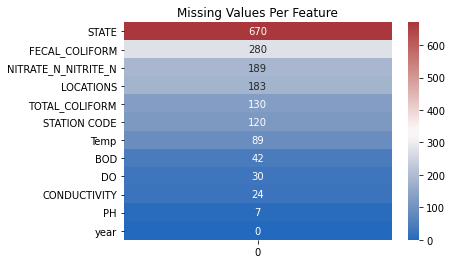

In [103]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')   1679

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

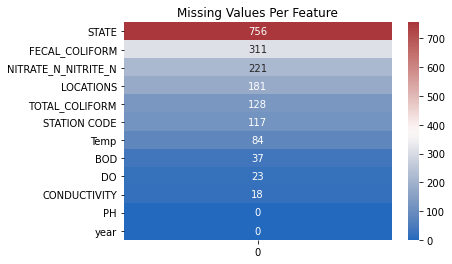

In [84]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["PH"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

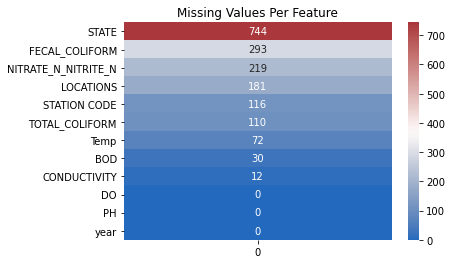

In [85]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["DO"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

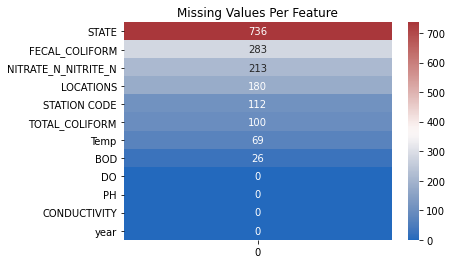

In [86]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["CONDUCTIVITY"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

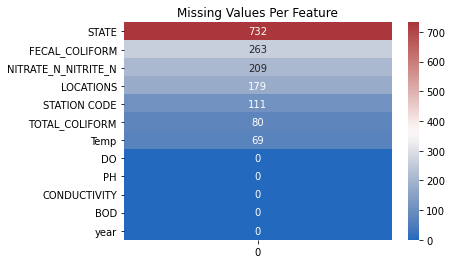

In [87]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["BOD"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

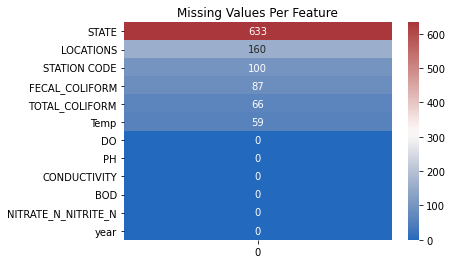

In [88]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["NITRATE_N_NITRITE_N"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [90]:
df.shape

(1713, 12)

In [89]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["FECAL_COLIFORM "].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

KeyError: 'FECAL_COLIFORM '

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

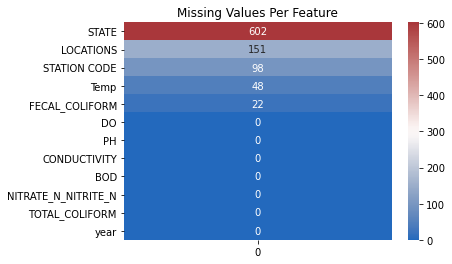

In [91]:
# Ce sont les exemples qui ne contiennent aucun attribut
# Les attributs remplis sont la médiane des colonnes correspondantes
# Il est donc préférable de les supprimer
df_null = df[(df["TOTAL_COLIFORM"].isnull())]
df_null_indices = df_null.index
df.drop(df_null_indices, axis=0, inplace=True)
df_null
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [92]:
df.shape

(1647, 12)